<a href="https://colab.research.google.com/github/Jesus-Manuel-Huerta-Najera/CarPrice/blob/main/3_2_Regresi%C3%B3n_lineal_CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.2 Regresión lineal CarPrice**

En equipo de no más de 3 integrantes, continuar con el análisis y realizar la regresión lineal del dataset car_price_assignment.csv


# EXTRACCIÓN DE CONOCIMIENTO EN BASES DE DATOS.

###  Nombre de los integrantes.
> *   Jesus Manuel Huerta Najera
*   Fatima Yatcin Perez Cruz
*   Maria del Carmen Hernandez Diaz


###  Matrículas.
> * 1718110393
* 1718110402
* 1718110389

###  Actividad.
> 3.2 Regresión lineal CarPrice

###  Grupo.
> IDGS - 91

```
Fecha: 28/10/2021

```


# **Resultado:**

**Parte 1 (esta se realizo de forma individual)**

1. Generar un Repositorio en GitHub de nombre CarPrice.
2. Crear un Notebook de Jupyter en Colab del mismo nombre.
3. Agregar sus datos personales en el Notebook como texto.
4. Realizar el análisis

**Parte 2 realizar los siguientes pasos al análisis**

1. Normalizar datos.
2. Convertir columnas categóricas en columnas numéricas.
3. Dividir el dataframe en train y test
4. Realizar una regresión lineal con todas las columnas numéricas.
5. Agregar sus conclusiones de la actividad en el Notebook.
6. Guardar el Notebook de Colab en Github.
7. Exportar el Notebook como PDF y enviarlo a classroom para su revisión.

# **Conclusiones**

Dentro del desarrollo de esta actividad hemos realizado un análisis a un Data Frame bastante interesante, el cual contiene principalmente información sobre las características de los automóviles, para poder desarrollar este Data Frame y verificar su contenido se realizaron pasos necesarios para la ejecución de este análisis. 

En la realización de los pasos, así como el desarrollo para la regresión lineal, fue interesante dar el siguiente paso para poder usar más de una columna, pues hasta el momento solo sabíamos trabajar con “x” y “y”, es probable que esto solo sea una pequeña muestra de lo que podemos hacer en conjunto con estas herramientas, sin embargo, como ya sabemos al complementar todo, obtenemos algo más espectacular y aporta demasiado a construir nuestro conocimiento.


# **1. Normalizar datos.**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split#.Dividir.los.datos.en.train.y.test
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from joblib import dump,load
print(np.__version__)
print(pd.__version__)

1.19.5
1.1.5


In [ ]:
valores = pd.read_csv('car_price_assignment.csv')
df = pd.DataFrame(valores.head(205))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


**Buscar los datos duplicados**



In [ ]:
df.duplicated().sum()

0

**Verificar si hay datos Nulos**

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Verificación de los últimos valores (segunda parte)**

In [ ]:
valores = pd.read_csv('car_price_assignment2.csv')
di = pd.DataFrame(valores.head(37))
di

,No,ID,Description
0,1,Car_ID,Unique id of each observation (Interger)
1,2,Symboling,"Its assigned insurance risk rating, A value of..."
2,3,carCompany,Name of car company (Categorical)
3,4,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,5,aspiration,Aspiration used in a car (Categorical)
5,6,doornumber,Number of doors in a car (Categorical)
6,7,carbody,body of car (Categorical)
7,8,drivewheel,type of drive wheel (Categorical)
8,9,enginelocation,Location of car engine (Categorical)
9,10,wheelbase,Weelbase of car (Numeric)


 **Verificacion de Datos duplicados.**

In [ ]:
di.duplicated().sum()

0

**Verificación de Datos Nulos**

In [ ]:
di.isnull().sum()

No             0
ID             0
Description    0
dtype: int64

**Separar  columnas categoricas**




In [ ]:
def categorical(dataframe):
   categorical_col = []
   for col in dataframe:
      if dataframe[col].dtype == 'object':
           categorical_col.append(col)
   return categorical_col

valores = categorical(df)
valores

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

**Obtención de Columnas Requeridas**

In [ ]:
var = ["fueltype","CarName","price","carlength"]
tests = df.filter(items=var) 
p1 = df.filter(items=["fueltype"]) 
p2 = df.filter(items=["CarName"]) 
p3 = df.filter(items=["price"]) 
p4 = df.filter(items=["carlength"]) 
p1

,fueltype
0,gas
1,gas
2,gas
3,gas
4,gas
...,...
200,gas
201,gas
202,gas
203,diesel


# **2. Convertir columnas categóricas en columnas numéricas.**

In [ ]:
filtrer = ["fueltype","CarName"]
pd.get_dummies(df, columns=valores,drop_first=True)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_ID_10,car_ID_100,car_ID_101,car_ID_102,car_ID_103,car_ID_104,car_ID_105,car_ID_106,car_ID_107,car_ID_108,car_ID_109,car_ID_11,car_ID_110,car_ID_111,car_ID_112,car_ID_113,car_ID_114,car_ID_115,car_ID_116,car_ID_117,car_ID_118,car_ID_119,car_ID_12,car_ID_120,car_ID_121,car_ID_122,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


**Mostrar las primeras 5 columnas**

In [ ]:
tests.head()

,fueltype,CarName,price,carlength
0,gas,alfa-romero giulia,13495.0,168.8
1,gas,alfa-romero stelvio,16500.0,168.8
2,gas,alfa-romero Quadrifoglio,16500.0,171.2
3,gas,audi 100 ls,13950.0,176.6
4,gas,audi 100ls,17450.0,176.6


**Conversión de columnas categoicas a  númericas.**

In [ ]:
pd.get_dummies(tests.head(3), columns=['fueltype','CarName'],drop_first=True)

,price,carlength,CarName_alfa-romero giulia,CarName_alfa-romero stelvio
0,13495.0,168.8,1,0
1,16500.0,168.8,0,1
2,16500.0,171.2,0,0


# **3. Dividir el dataframe en train y test**

In [ ]:
def categorical(dataframe):
   categorical_col = []
   for col in dataframe:
      if dataframe[col].dtype != 'object':
           categorical_col.append(col)
   return categorical_col

numero = categorical(df)
numeros = df.filter(items=numero) 
numero

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

**Proceso de Regresión Lineal Múltiple**



**Se muestra una Gráfica** 

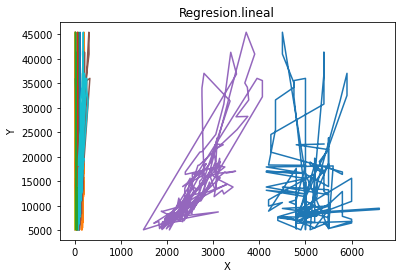

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
97,94.5,170.2,63.8,53.5,2037.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
198,104.3,188.8,67.2,56.2,3045.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0
51,93.1,159.1,64.2,54.1,1900.0,91.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
63,98.8,177.8,66.5,55.5,2443.0,122.0,3.39,3.39,22.7,64.0,4650.0,36.0,42.0
74,112.0,199.2,72.0,55.4,3715.0,304.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,95.7,158.7,63.6,54.5,2015.0,92.0,3.05,3.03,9.0,62.0,4800.0,31.0,38.0
116,107.9,186.7,68.4,56.7,3252.0,152.0,3.70,3.52,21.0,95.0,4150.0,28.0,33.0
53,93.1,166.8,64.2,54.1,1945.0,91.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
38,96.5,167.5,65.2,53.3,2289.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0


In [ ]:
df_x = numeros[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']]
df_y = numeros['price']


plt.plot(df_x,df_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresion.lineal")
plt.savefig("rl.png")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1234)
x_train


# **4. Realizar una regresión lineal con todas las columnas numéricas.**

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

y_hat = model.predict(x_test)
acc = r2_score(y_test, y_hat)
print("Accuracy: %.2f" % acc)

dump(model,"model.joblib")

Accuracy: 0.60


['model.joblib']